# <font color='white' size='30'>**Los Angeles Crime Data Dive**</font>

<div style="background-color: #18C0C4; padding: 0px; color: #18C0C4;">

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font color='white' size='10'><i>**Plan**</i></font> <font size='5'><i>→ Acquire → Prepare → Explore → Model → Deliver</i></font>

<i>The original CSV files did not contain HIPAA information. They did however contain some pharmacy employee information and prescription numbers.</i>

<font color='white' size='5'>

- Used Discern Analytics - Defense Health Agnecy (DHA) reporting tool 

- I pulled pharmacy data for the previous year (October 1, 2022 to September 27, 2023)

<font color='white' size='5'>

**With this data, I intend to find out:** </font>

- Are certain days of the week busier than others at the pharmacy?

- Are there trends during certain times of the month for patients to pick up meds? (After payday?)

- Are certain medications seasonal?
   
- Is there enough of a difference in seasonal medications, that we should increase supply?

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font size='5'><i>Plan → </i></font> <font color='white' size='10'><i>**Acquire**</i></font> <font size='5'><i> → Prepare → Explore → Model → Deliver</i></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def check_columns(DataFrame, reports=False, graphs=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe.
    """
    print(f"Total rows: {DataFrame.shape[0]}")
    print(f"Total columns: {DataFrame.shape[1]}")
    if reports:
        describe = DataFrame.describe().round(2)
        print(describe)
    if graphs:
        DataFrame.hist(figsize=(10, 10))
        plt.subplots_adjust(hspace=0.5)
        plt.show()

    data = []
    for column in DataFrame.columns:
        dtype = DataFrame[column].dtype
        unique_vals = DataFrame[column].unique()
        num_unique = DataFrame[column].nunique()
        num_null = DataFrame[column].isna().sum()
        pct_null = DataFrame[column].isna().mean().round(5)

        if pd.api.types.is_numeric_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            mean_val = DataFrame[column].mean().round(2)
            range_vals = (min_val, max_val, mean_val)
        else:
            range_vals = None

        data.append(
            [column, dtype, num_unique, num_null, pct_null, unique_vals, range_vals]
        )

    return pd.DataFrame(
        data,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

In [3]:
# Load the dataset
data1 = pd.read_csv("crime_data_2010_2019.csv")
data2 = pd.read_csv("crime_data_2020_2023.csv")

# Concat the 2
data = pd.concat([data1, data2])

In [4]:
# Cache the combined CSV
data.to_csv("crime_data_2010_2023.csv")

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font size='5'><i>Plan → Acquire → </i></font> <font color='white' size='10'><i>**Prepare**</i></font> <font size='5'><i> → Explore → Model → Deliver</i></font>

In prepare, since we could potentially be trying to find trends in volume of crime, I found it important only drop rows if we absolutely have to. Most nulls will be assigned to 'Unknown'.

### Surface Level Prep Using Univariate Analysis

Total rows: 1614754
Total columns: 28


              DR_NO    TIME OCC        AREA  Rpt Dist No    Part 1-2  \
count  1.614754e+06  1614754.00  1614754.00   1614754.00  1614754.00   
mean   2.158850e+08     1335.49       10.71      1117.79        1.41   
std    1.074677e+07      654.14        6.09       609.25        0.49   
min    8.170000e+02        1.00        1.00       101.00        1.00   
25%    2.101192e+08      900.00        6.00       622.00        1.00   
50%    2.201087e+08     1415.00       11.00      1142.00        1.00   
75%    2.219051e+08     1900.00       16.00      1617.00        2.00   
max    2.399165e+08     2359.00       21.00      2199.00        2.00   

           Crm Cd    Vict Age   Premis Cd  Weapon Used Cd    Crm Cd 1  \
count  1614754.00  1614754.00  1614736.00       562348.00  1614734.00   
mean       500.75       29.84      305.74          362.88      500.49   
std        207.83       21.77      216.59          123.72      207.61   
min        110.00       -3.00      101.00          101.00  

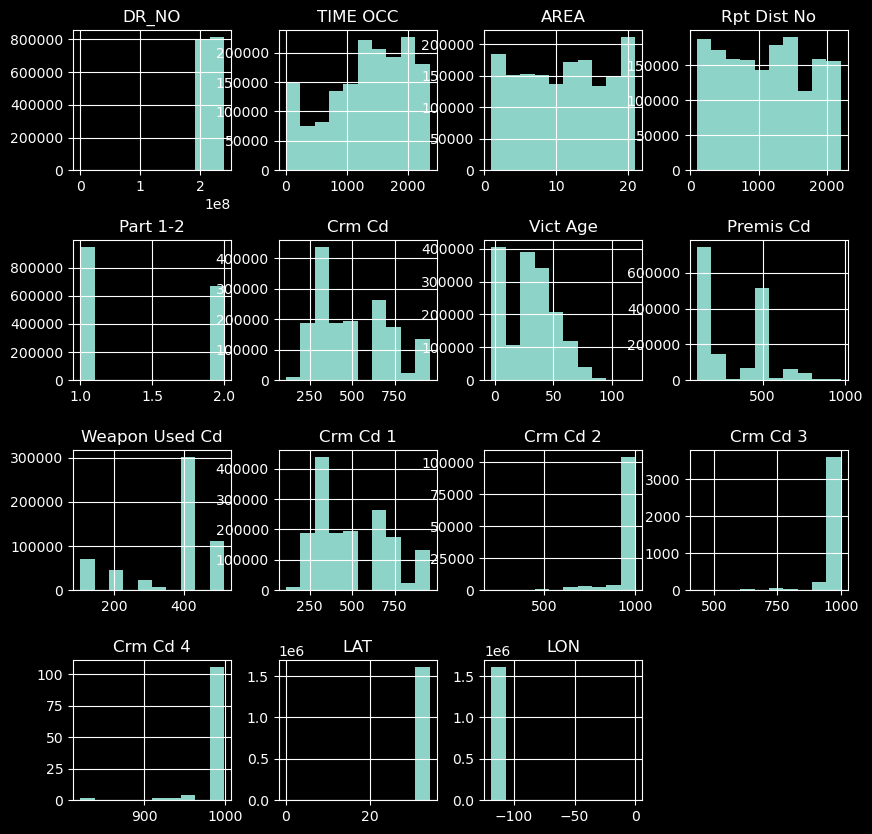

,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,DR_NO,int64,807377,0,0.00000,"[10304468, 190101086, 200110444, 191501505, 19...","(817, 239916487, 215885045.12)"
1,Date Rptd,object,1364,0,0.00000,"[01/08/2020 12:00:00 AM, 01/02/2020 12:00:00 A...",None
2,DATE OCC,object,1364,0,0.00000,"[01/08/2020 12:00:00 AM, 01/01/2020 12:00:00 A...",None
3,TIME OCC,int64,1439,0,0.00000,"[2230, 330, 1200, 1730, 415, 30, 1315, 40, 200...","(1, 2359, 1335.49)"
4,AREA,int64,21,0,0.00000,"[3, 1, 15, 19, 17, 11, 5, 9, 10, 8, 7, 14, 2, ...","(1, 21, 10.71)"
5,AREA NAME,object,21,0,0.00000,"[Southwest, Central, N Hollywood, Mission, Dev...",None
6,Rpt Dist No,int64,1204,0,0.00000,"[377, 163, 155, 1543, 1998, 161, 101, 1708, 19...","(101, 2199, 1117.79)"
7,Part 1-2,int64,2,0,0.00000,"[2, 1]","(1, 2, 1.41)"
8,Crm Cd,int64,138,0,0.00000,"[624, 845, 745, 740, 121, 442, 946, 341, 330, ...","(110, 956, 500.75)"
9,Crm Cd Desc,object,138,0,0.00000,"[BATTERY - SIMPLE ASSAULT, SEX OFFENDER REGIST...",None


In [5]:
check_columns(data, graphs=True, reports=True)

### Logically Rename Columns

In [6]:
# Get all the columns names in a nice copy & paste format for ease
data.columns.to_list()

['DR_NO',
 'Date Rptd',
 'DATE OCC',
 'TIME OCC',
 'AREA',
 'AREA NAME',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Crm Cd Desc',
 'Mocodes',
 'Vict Age',
 'Vict Sex',
 'Vict Descent',
 'Premis Cd',
 'Premis Desc',
 'Weapon Used Cd',
 'Weapon Desc',
 'Status',
 'Status Desc',
 'Crm Cd 1',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'LOCATION',
 'Cross Street',
 'LAT',
 'LON']

In [7]:
# Rename logically to evalute nulls and such
data = data.rename(
    columns={
        "DR_NO": "dragnet_number",
        "Date Rptd": "date_reported",
        "DATE OCC": "date_occurred",
        "TIME OCC": "time_occurred",
        "AREA": "area_id",
        "AREANAME": "area_name",
        "Rpt Dist No": "report_district",
        "Part 1-2": "part_1_2",
        "Crm Cd": "crime_code",
        "Crm Cd Desc": "crime_code_description",
        "Mocodes": "modus_operandi_code",
        "Vict Age": "victim_age",
        "Vict Sex": "victim_sex",
        "Vict Descent": "victim_descent",
        "Premis Cd": "premise_code",
        "Premis Desc": "premise_description",
        "Weapon Used Cd": "weapon_used_code",
        "Weapon Desc": "weapon_description",
        "Status": "status",
        "Status Desc": "status_description",
        "Crm Cd 1": "crime_code_1",
        "Crm Cd 2": "crime_code_2",
        "Crm Cd 3": "crime_code_3",
        "Crm Cd 4": "crime_code_4",
        "LOCATION": "location",
        "Cross Street": "cross_street",
        "LAT": "lat",
        "LON": "lon",
        "AREA ": "area_id",
    }
)

### Choose columns to work with

In [8]:
check_columns(data)

Total rows: 1614754
Total columns: 28


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,dragnet_number,int64,807377,0,0.00000,"[10304468, 190101086, 200110444, 191501505, 19...","(817, 239916487, 215885045.12)"
1,date_reported,object,1364,0,0.00000,"[01/08/2020 12:00:00 AM, 01/02/2020 12:00:00 A...",None
2,date_occurred,object,1364,0,0.00000,"[01/08/2020 12:00:00 AM, 01/01/2020 12:00:00 A...",None
3,time_occurred,int64,1439,0,0.00000,"[2230, 330, 1200, 1730, 415, 30, 1315, 40, 200...","(1, 2359, 1335.49)"
4,area_id,int64,21,0,0.00000,"[3, 1, 15, 19, 17, 11, 5, 9, 10, 8, 7, 14, 2, ...","(1, 21, 10.71)"
5,AREA NAME,object,21,0,0.00000,"[Southwest, Central, N Hollywood, Mission, Dev...",None
6,report_district,int64,1204,0,0.00000,"[377, 163, 155, 1543, 1998, 161, 101, 1708, 19...","(101, 2199, 1117.79)"
7,part_1_2,int64,2,0,0.00000,"[2, 1]","(1, 2, 1.41)"
8,crime_code,int64,138,0,0.00000,"[624, 845, 745, 740, 121, 442, 946, 341, 330, ...","(110, 956, 500.75)"
9,crime_code_description,object,138,0,0.00000,"[BATTERY - SIMPLE ASSAULT, SEX OFFENDER REGIST...",None


In [9]:
# Drop columns we won't be using due to project scale and time

data = data[
    [
        "date_reported",
        "date_occurred",
        "time_occurred",
        "area_name",
        "part_1_2",
        "crime_code_description",
        "victim_age",
        "victim_sex",
        "victim_descent",
        "premise_description",
        "weapon_description",
        "location",
        "lat",
        "lon",
    ]
]

KeyError: "['area_name'] not in index"

### Columns not used

<b>With more time, could be useful to go back and try to clean</b>

- `modus_operandi_code`
- `status_description`
- `report_district`
- `dragnet_number`
- `status`  

<b>Redundant/Numerical Codes of Data</b>
      
- `crime_code`
- `premise_code`       
- `weapon_used_code`    
- `crime_code_1`
- `crime_code_2`
- `crime_code_3`
- `crime_code_4`
- `area_id`

<b>Too many Nulls</b>

- `cross_street`

In [ ]:
check_columns(data)

Total rows: 2943476
Total columns: 14


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,date_reported,datetime64[ns],5016,0,0.00000,"[2020-01-08 00:00:00, 2020-01-02 00:00:00, 202...","[2010-01-01 00:00:00, 2023-09-25 00:00:00, 201..."
1,date_occurred,datetime64[ns],5016,0,0.00000,"[2020-01-08 00:00:00, 2020-01-01 00:00:00, 202...","[2010-01-01 00:00:00, 2023-09-25 00:00:00, 201..."
2,time_occurred,int64,1439,0,0.00000,"[2230, 330, 1200, 1730, 415, 30, 1315, 40, 200...","[1.0, 2359.0, 1352.8683974321516]"
3,area_name,object,21,0,0.00000,"[Southwest, Central, N Hollywood, Mission, Dev...",None
4,part_1_2,int64,2,0,0.00000,"[2, 1]","[1.0, 2.0, 1.4370971599564597]"
5,crime_code_description,object,143,0,0.00000,"[BATTERY - SIMPLE ASSAULT, SEX OFFENDER REGIST...",None
6,victim_age,int64,113,0,0.00000,"[36, 25, 0, 76, 31, 23, 29, 35, 41, 24, 34, 46...","[-12.0, 120.0, 31.202724601797332]"
7,victim_sex,object,6,306533,0.10414,"[F, M, X, nan, H, -, N]",None
8,victim_descent,object,20,306586,0.10416,"[B, H, X, W, A, O, nan, C, F, K, I, V, Z, J, P...",None
9,premise_description,object,320,666,0.00023,"[SINGLE FAMILY DWELLING, SIDEWALK, POLICE FACI...",None


### Deeper Preparation

Preparation plans after pulling out relevant columns:


- Change time occurred to 4 digit 24 hour time, maybe datetime?

- Looks like we have negative values in the victim_age. We will most likely drop those

- We'll have to map victim_sex. We can assume F = Female, M = Male, X = Non binary. Due to large amount of other values, we will make them 'unknown'.

- We'll map the victim_descent based on abbreviations and assign nulls 'unknown'

- Very small amount of nulls in premise_description (0.00023). We'll assign them 'unknown'.

- 66% Nulls in weapon_description, we'll fill them with 'No Weapon'.

- We'll bin the weapons into categories

### Fix Time Occurred
Change time occurred to 4 digit 24 hour time, maybe datetime?

In [ ]:
# Convert date columns to datetime format
data["date_reported"] = pd.to_datetime(
    data["date_reported"], format="%m/%d/%Y %I:%M:%S %p"
)
data["date_occurred"] = pd.to_datetime(
    data["date_occurred"], format="%m/%d/%Y %I:%M:%S %p"
)

# Change the time occurred to 4 digit 24 hour time
data["time_occurred"] = data["time_occurred"].astype(str).str.zfill(4)

# Change time_occurred to be date time, but only the time
data["time_occurred"] = pd.to_datetime(data["time_occurred"], format="%H%M").dt.time

# Sanity check
data["time_occurred"].value_counts(normalize=True)

/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_18813/2265992581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_occurred"] = data["time_occurred"].astype(str).str.zfill(4)


time_occurred
12:00:00    0.049091
18:00:00    0.028580
20:00:00    0.026680
17:00:00    0.025769
19:00:00    0.025141
              ...   
05:01:00    0.000013
05:34:00    0.000012
04:31:00    0.000011
05:51:00    0.000010
05:31:00    0.000008
Name: proportion, Length: 1439, dtype: float64

In [ ]:
# Add time_occurred to the date_occurred as an hour

data["date_occurred"] = data["date_occurred"] + pd.to_timedelta(
    data["time_occurred"].astype(str)
)

/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_18813/1293368493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_occurred'] = data["date_occurred"] + pd.to_timedelta(


### Fix Victim Age 
Looks like we have negative values in the victim_age. We will have to drop those

In [ ]:
# Show value counts for victim age
data["victim_age"].value_counts(normalize=True)

victim_age
 0      1.949525e-01
 28     2.183745e-02
 25     2.182793e-02
 30     2.176474e-02
 27     2.175591e-02
            ...     
-8      3.397344e-06
-12     6.794688e-07
 120    3.397344e-07
-11     3.397344e-07
 118    3.397344e-07
Name: proportion, Length: 113, dtype: float64

In [ ]:
# Show only negative values
data[data["victim_age"] < 0]

,date_reported,date_occurred,time_occurred,area_name,part_1_2,crime_code_description,victim_age,victim_sex,victim_descent,premise_description,weapon_description,location,lat,lon,weapon_category,time_occurred_rounded
4402,2022-01-18,2020-07-16,03:00:00,Pacific,1,BURGLARY,-1,X,X,OTHER BUSINESS,No Weapon,8600 S SEPULVEDA BL,33.9598,-118.3962,No Weapon,03:00:00
5531,2020-11-25,2020-11-24,15:20:00,West LA,1,BURGLARY,-1,X,X,HIGH SCHOOL,UNKNOWN TYPE CUTTING INSTRUMENT,2400 S SHENANDOAH ST,34.0394,-118.3850,Bladed/Sharp Object,15:00:00
12845,2022-02-25,2020-12-13,14:30:00,Topanga,2,THEFT OF IDENTITY,-1,M,W,STREET,No Weapon,6600 TOPANGA CANYON BL,34.1904,-118.6059,No Weapon,14:00:00
12959,2022-02-21,2020-05-30,23:00:00,Wilshire,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",-1,X,X,OTHER BUSINESS,No Weapon,8400 BEVERLY BL,34.0782,-118.3695,No Weapon,23:00:00
13046,2022-03-16,2020-03-13,12:00:00,Van Nuys,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",-1,F,W,HIGH SCHOOL,No Weapon,13000 OXNARD ST,34.1794,-118.4161,No Weapon,12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108771,2021-01-12,2019-01-01,19:25:00,Hollywood,2,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",-2,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No Weapon,6100 FRANKLIN AV,34.1053,-118.3226,No Weapon,19:00:00
2108981,2023-06-11,2019-09-11,17:15:00,Mission,2,THEFT OF IDENTITY,-3,M,W,SINGLE FAMILY DWELLING,No Weapon,13200 RELIANCE ST,34.2313,-118.4205,No Weapon,17:00:00
2110290,2022-03-15,2019-09-28,10:00:00,West LA,1,THEFT PLAIN - PETTY ($950 & UNDER),-2,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No Weapon,10000 S SANTA MONICA BL,34.0632,-118.4153,No Weapon,10:00:00
2129305,2021-01-19,2019-10-16,11:00:00,Hollenbeck,1,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,-1,M,W,PARKING LOT,No Weapon,2800 E WASHINGTON BL,34.0173,-118.2196,No Weapon,11:00:00


In [ ]:
# Drop negative ages
data = data[data["victim_age"] >= 0]

### Fix Victim Descent
We'll map the victim_descent based on abbreviations and assign nulls 'unknown'

In [ ]:
# Label them to the full name
descent_categories = {
    "H": "Hispanic",
    "W": "White",
    "O": "Unknown",
    "B": "Black",
    "A": "Asian",
    "X": "Unknown",
    "F": "Filipino",
    "K": "Korean",
    "C": "Chinese",
    "U": "Pacific Islander",
    "J": "Japanese",
    "V": "Vietnamese",
    "I": "American Indian/Alaskan Native",
    "G": "Guamanian",
    "P": "Asian Indian",
    "Z": "Asian Indian",
    "S": "Samoan",
    "D": "Cambodian",
    "L": "Laotian",
    "N": "Asian Indian",
    " ": "Unknown",
    "-": "Unknown",
}

# Map the vict descent to the full name
data["victim_descent"] = data["victim_descent"].map(
    lambda desc: descent_categories.get(desc, "Unknown")
)

/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_18813/504419341.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["victim_descent"] = data["victim_descent"].map(


In [ ]:
# Sanity Check
data["victim_descent"].value_counts()

victim_descent
Hispanic                          981087
Unknown                           731604
White                             677292
Black                             453556
Asian                              69016
Korean                             13453
Filipino                            6159
Chinese                             4277
American Indian/Alaskan Native      1757
Japanese                            1581
Asian Indian                        1151
Vietnamese                          1077
Pacific Islander                     360
Guamanian                            143
Cambodian                             85
Samoan                                82
Laotian                               72
Name: count, dtype: int64

### Fix Victim Sex
We'll have to map victim_sex. We can assume F = Female, M = Male, X = Non binary. Due to large amount of other values, we will make them 'unknown'.

In [ ]:
# Show the value counts of victim_sex
print(data["victim_sex"].value_counts(dropna=False))

victim_sex
M      1314813
F      1194420
NaN     306532
X       126801
H          167
N           17
-            2
Name: count, dtype: int64


In [ ]:
# Replace any values in the victim_sex column that aren't "M", "F", or "X" with "Unknown"
data.loc[~data["victim_sex"].isin(["M", "F", "X"]), "victim_sex"] = "Unknown"

In [ ]:
# Show the value counts of victim_sex
print(data["victim_sex"].value_counts(dropna=False))

victim_sex
M          1314813
F          1194420
Unknown     306718
X           126801
Name: count, dtype: int64


### Nulls in premise_description 
Very small amount of nulls in premise_description (0.00023). We'll assign them 'unknown'.

In [ ]:
# Show the nulls in premise_description
data[data["premise_description"].isna()]

,date_reported,date_occurred,time_occurred,area_name,part_1_2,crime_code_description,victim_age,victim_sex,victim_descent,premise_description,weapon_description,location,lat,lon,weapon_category,time_occurred_rounded
6057,2020-10-03,2020-10-03 03:45:00,03:45:00,West Valley,1,BURGLARY,0,M,White,NaN,No Weapon,7500 WOODLEY AV,34.2066,-118.4837,No Weapon,03:00:00
9613,2020-12-30,2020-12-22 20:00:00,20:00:00,Pacific,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,Unknown,NaN,No Weapon,800 S SEPULVEDA BL,33.9529,-118.3961,No Weapon,20:00:00
11182,2020-07-09,2020-07-09 10:20:00,10:20:00,Harbor,1,ROBBERY,0,X,Unknown,NaN,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",25900 WESTERN AV,33.7879,-118.3075,Blunt Instrument,10:00:00
17515,2020-02-08,2020-02-07 19:50:00,19:50:00,Van Nuys,1,ROBBERY,23,F,Hispanic,NaN,HAND GUN,6300 VAN NUYS BL,34.1831,-118.4523,Firearm,19:00:00
17628,2020-06-07,2020-05-30 18:30:00,18:30:00,Wilshire,1,ATTEMPTED ROBBERY,38,M,Hispanic,NaN,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",8400 W 3RD ST,34.0730,-118.3731,Blunt Instrument,18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130311,2019-12-17,2019-12-15 21:45:00,21:45:00,Rampart,2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,X,Unknown,NaN,No Weapon,100 S ALVARADO ST,34.0667,-118.2703,No Weapon,21:00:00
2130908,2019-08-20,2019-08-20 05:40:00,05:40:00,N Hollywood,1,BURGLARY,0,X,Unknown,NaN,No Weapon,3700 CAHUENGA BL,34.1350,-118.3612,No Weapon,05:00:00
2135084,2019-07-28,2019-07-27 18:00:00,18:00:00,Central,1,"BURGLARY, ATTEMPTED",0,M,Unknown,NaN,No Weapon,600 CROCKER ST,34.0417,-118.2443,No Weapon,18:00:00
2135601,2019-08-29,2019-08-29 01:00:00,01:00:00,77th Street,1,CRIMINAL HOMICIDE,32,M,Hispanic,NaN,HAND GUN,8100 S BROADWAY,33.9660,-118.2783,Firearm,01:00:00


In [ ]:
# Reassign nulls in premise description to unknown
data["premise_description"] = data["premise_description"].fillna("Unknown")

/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_18813/1952772534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["premise_description"] = data["premise_description"].fillna("Unknown")


### Weapon_description 
66% Nulls in weapon_description, we'll fill them with 'No Weapon'.

In [ ]:
# Fill nulls in weapon with no weapon
data["weapon_description"] = data["weapon_description"].fillna("No Weapon")

/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_18813/1687406155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["weapon_description"] = data["weapon_description"].fillna("No Weapon")


### Weapon_category
Make a weapon bin out of all of the weapon_descriptions

In [ ]:
# View all the different weapons
data["weapon_description"].unique()

array(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', 'No Weapon', 'ROCK/THROWN OBJECT',
       'VERBAL THREAT', 'FOLDING KNIFE', 'BLUNT INSTRUMENT', 'BOTTLE',
       'SEMI-AUTOMATIC PISTOL', 'CLUB/BAT', 'OTHER CUTTING INSTRUMENT',
       'HAND GUN', 'PHYSICAL PRESENCE', 'VEHICLE', 'SCISSORS', 'STICK',
       'MACHETE', 'OTHER KNIFE', 'SHOTGUN',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'FIRE', 'ICE PICK', 'GLASS',
       'SIMULATED GUN', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'DEMAND NOTE', 'BOMB THREAT', 'PIPE/METAL PIPE', 'UNKNOWN FIREARM',
       'MACE/PEPPER SPRAY', 'HAMMER', 'RAZOR', 'OTHER FIREARM',
       'BELT FLAILING INSTRUMENT/CHAIN',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'SCREWDRIVER', 'KITCHEN KNIFE',
       'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'BRASS KNUCKLES', 'REVOLVER',
       'SWITCH BLADE', 'STUN GUN', 'AXE', 'RIFLE',
       'ASSAULT WEAPON/UZI/AK47/ETC', 'ANTIQUE FIREARM', 'FIXED OBJECT',
       'SEMI-AUTOMAT

In [ ]:
# Change all the weapons to categories
weapon_categories = {
    "No Weapon": ["No Weapon"],
    "Firearm": [
        "M1-1 SEMIAUTOMATIC ASSAULT RIFLE",
        "SEMI-AUTOMATIC PISTOL",
        "HAND GUN",
        "SIMULATED GUN",
        "UNKNOWN FIREARM",
        "SHOTGUN",
        "AIR PISTOL/REVOLVER/RIFLE/BB GUN",
        "REVOLVER",
        "ASSAULT WEAPON/UZI/AK47/ETC",
        "ANTIQUE FIREARM",
        "SEMI-AUTOMATIC RIFLE",
        "RIFLE",
        "HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE",
        "MAC-11 SEMIAUTOMATIC ASSAULT WEAPON",
        "SAWED OFF RIFLE/SHOTGUN",
        "HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE",
        "UZI SEMIAUTOMATIC ASSAULT RIFLE",
        "UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE",
        "M-14 SEMIAUTOMATIC ASSAULT RIFLE",
        "AUTOMATIC WEAPON/SUB-MACHINE GUN",
        "STARTER PISTOL/REVOLVER",
        "MAC-10 SEMIAUTOMATIC ASSAULT WEAPON",
        "RELIC FIREARM",
        "OTHER FIREARM",
    ],
    "Bladed/Sharp Object": [
        "MACHETE",
        "OTHER CUTTING INSTRUMENT",
        "FOLDING KNIFE",
        "OTHER KNIFE",
        "KNIFE WITH BLADE 6INCHES OR LESS",
        "ICE PICK",
        "KNIFE WITH BLADE OVER 6 INCHES IN LENGTH",
        "KITCHEN KNIFE",
        "SWITCH BLADE",
        "DIRK/DAGGER",
        "BOWIE KNIFE",
        "STRAIGHT RAZOR",
        "CLEAVER",
        "RAZOR BLADE",
        "SCISSORS",
        "AXE",
        "UNKNOWN TYPE CUTTING INSTRUMENT",
        "SWORD",
        "RAZOR",
        "SCREWDRIVER",
        "BOW AND ARROW",
        "SYRINGE",
    ],
    "Blunt Instrument": [
        "STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",
        "ROCK/THROWN OBJECT",
        "BLUNT INSTRUMENT",
        "BOTTLE",
        "CLUB/BAT",
        "STICK",
        "PIPE/METAL PIPE",
        "HAMMER",
        "BELT FLAILING INSTRUMENT/CHAIN",
        "TIRE IRON",
        "CONCRETE BLOCK/BRICK",
        "BOARD",
        "BLACKJACK",
        "BRASS KNUCKLES",
    ],
    "Threats": [
        "UNKNOWN WEAPON/OTHER WEAPON",
        "VERBAL THREAT",
        "PHYSICAL PRESENCE",
        "DEMAND NOTE",
        "BOMB THREAT",
    ],
    "Other": [
        "VEHICLE",
        "GLASS",
        "MACE/PEPPER SPRAY",
        "STUN GUN",
        "EXPLOXIVE DEVICE",
        "DOG/ANIMAL (SIC ANIMAL ON)",
        "SCALDING LIQUID",
        "ROPE/LIGATURE",
        "TOY GUN",
        "CAUSTIC CHEMICAL/POISON",
        "MARTIAL ARTS WEAPONS",
        "LIQUOR/DRUGS",
        "FIRE",
        "FIXED OBJECT",
    ],
}

In [ ]:
# Map the weapon descriptions to their categories
data["weapon_category"] = data["weapon_description"].map(
    lambda desc: next(
        (cat for cat, weapons in weapon_categories.items() if desc in weapons),
        "Unknown",
    )
)

/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_18813/1219908016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["weapon_category"] = data["weapon_description"].map(


In [ ]:
# Sanity check
data["weapon_category"].value_counts()

weapon_category
No Weapon              1943817
Blunt Instrument        632729
Threat                  171082
Firearm                 106716
Bladed/Sharp Object      62647
Other                    26485
Name: count, dtype: int64

In [ ]:
# Move date occurred to the index and sort

data = data.set_index("date_occurred").sort_index()

### Create report_delay column
Take the date of reporting, subtract the reported date

In [ ]:
# Make a new column by subtracting date occurred minus date reported
data["time_to_report"] = data["date_reported"] - data["date_occurred"]

# Round time_to_report to the closest day
data["time_to_report"] = data["time_to_report"].dt.round("D")

# If a value is negative, make it 0 days
data.loc[
    data["time_to_report"] < pd.Timedelta(days=0), "time_to_report"
] = pd.Timedelta(days=0)

# Value counts for time to report
data["time_to_report"].value_counts()

/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_18813/75911192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_to_report"] = data["date_reported"] - data['date_occurred']
/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_18813/75911192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_to_report"] = data["time_to_report"].dt.round("D")


time_to_report
0 days       1986298
1 days        239398
2 days        124933
3 days         66740
4 days         53717
              ...   
3091 days          1
3756 days          1
3185 days          1
2520 days          1
1655 days          1
Name: count, Length: 3603, dtype: int64

### Final Look at prepped DF

In [ ]:
check_columns(data)

Total rows: 2942752
Total columns: 17


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,date_reported,datetime64[ns],5016,0,0.0,"[2020-01-08 00:00:00, 2020-01-02 00:00:00, 202...","[2010-01-01 00:00:00, 2023-09-25 00:00:00, 201..."
1,date_occurred,datetime64[ns],912790,0,0.0,"[2020-01-08 22:30:00, 2020-01-01 03:30:00, 202...","[2010-01-01 00:01:00, 2023-09-25 23:30:00, 201..."
2,time_occurred,object,1439,0,0.0,"[22:30:00, 03:30:00, 12:00:00, 17:30:00, 04:15...",None
3,area_name,object,21,0,0.0,"[Southwest, Central, N Hollywood, Mission, Dev...",None
4,part_1_2,int64,2,0,0.0,"[2, 1]","[1.0, 2.0, 1.4370456633790412]"
5,crime_code_description,object,143,0,0.0,"[BATTERY - SIMPLE ASSAULT, SEX OFFENDER REGIST...",None
6,victim_age,int64,101,0,0.0,"[36, 25, 0, 76, 31, 23, 29, 35, 41, 24, 34, 46...","[0.0, 120.0, 31.211028656169464]"
7,victim_sex,object,4,0,0.0,"[F, M, X, Unknown]",None
8,victim_descent,object,17,0,0.0,"[Black, Hispanic, Unknown, White, Asian, Chine...",None
9,premise_description,object,321,0,0.0,"[SINGLE FAMILY DWELLING, SIDEWALK, POLICE FACI...",None


### Prepped CSV File

Extract CSV after prepping to be used from here on out.

In [ ]:
# Cache the data DF as a CSV post-prep
data.to_csv("crime_data_prepped.csv")

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font size='5'><i>Plan → Acquire → Prepare → </i></font> <font color='white' size='10'><i>**Explore**</i></font> <font size='5'><i>→ Model → Deliver</i></font>

<Axes: xlabel='date_occurred'>

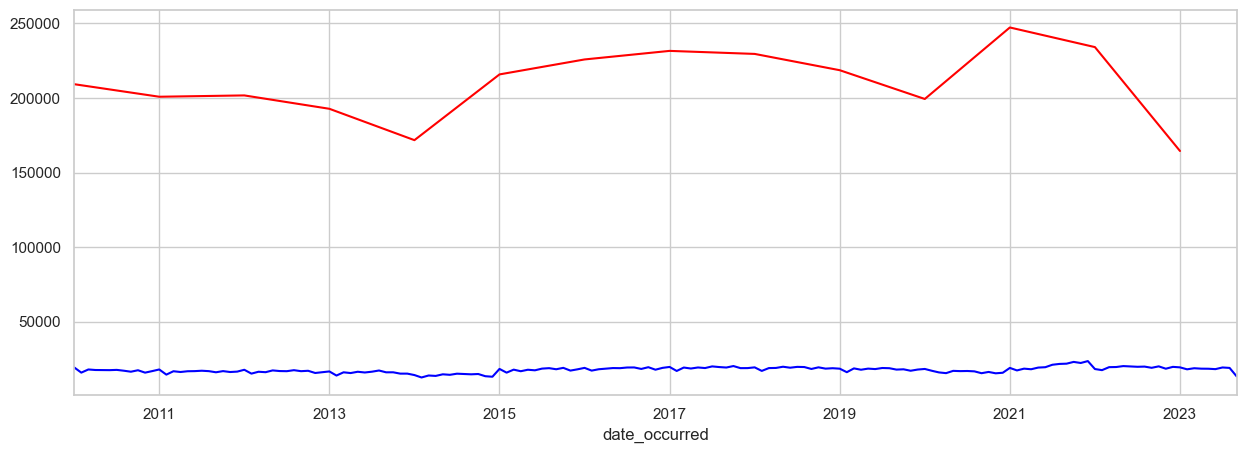

In [ ]:
# Plot the crime count by year, month
data.resample("Y").size().plot(
    figsize=(15, 5), label="Number of Crimes by Year", color="red"
)
data.resample("M").size().plot(
    figsize=(15, 5), label="Number of Crimes by Month", color="blue"
)

<Axes: xlabel='date_occurred'>

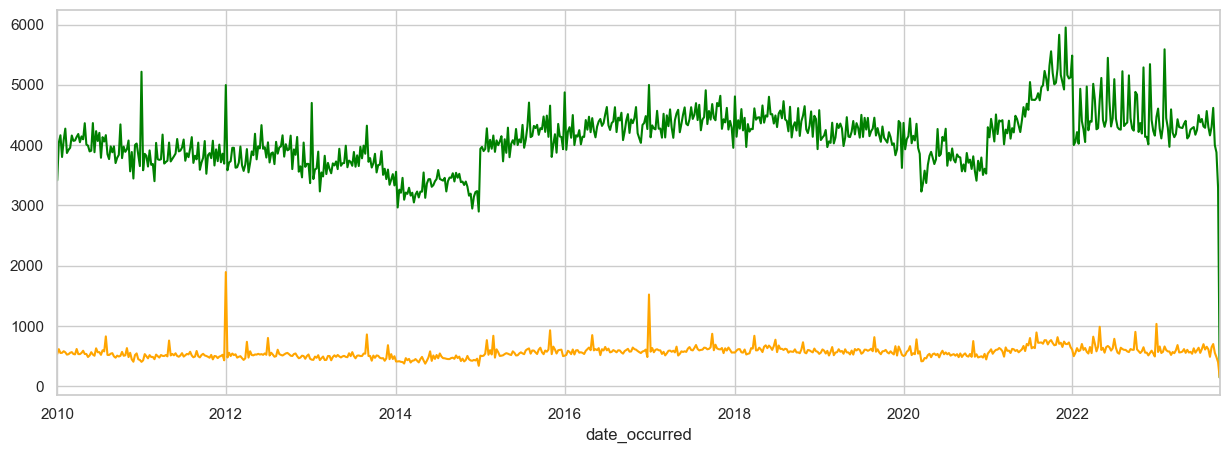

In [ ]:
# Plot the crime count by week, day

data.resample("W").size().plot(
    figsize=(15, 5), label="Number of Crimes by Week", color="green"
)
data.resample("D").size().plot(
    figsize=(15, 5), label="Number of Crimes by Day", color="orange"
)

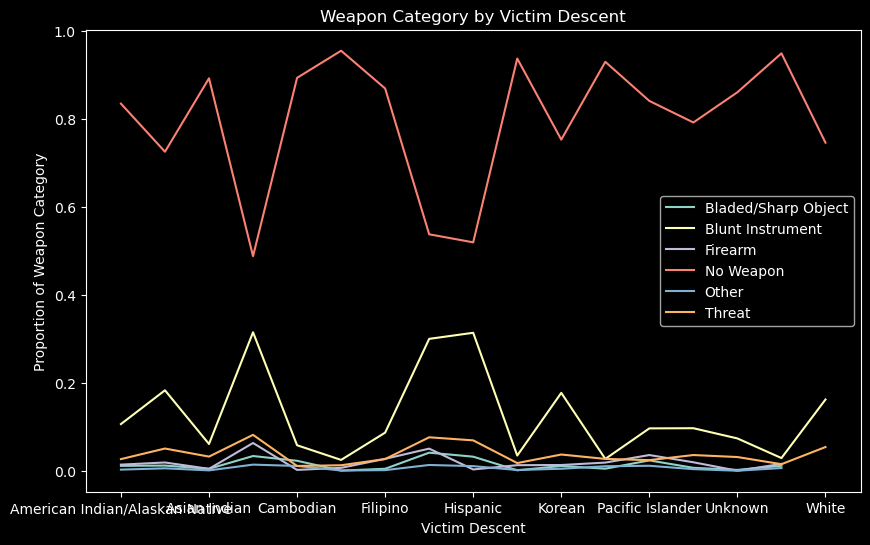

In [ ]:
# Group the data by victim descent and weapon category
grouped_data = (
    data.groupby(["victim_descent", "weapon_category"]).size().reset_index(name="count")
)

# Calculate the total count of each victim descent
total_counts = grouped_data.groupby("victim_descent")["count"].sum()

# Calculate the proportion of each weapon category for each victim descent
grouped_data["proportion"] = grouped_data.apply(
    lambda row: row["count"] / total_counts[row["victim_descent"]], axis=1
)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
for key, grp in grouped_data.groupby("weapon_category"):
    ax = grp.plot(ax=ax, kind="line", x="victim_descent", y="proportion", label=key)
ax.set_xlabel("Victim Descent")
ax.set_ylabel("Proportion of Weapon Category")
ax.set_title("Weapon Category by Victim Descent")
plt.show()

In [ ]:
data

,date_reported,time_occurred,area_name,part_1_2,crime_code_description,victim_age,vict_sex,vict_descent,weapon_desc,status_desc,location,lat,lon,area_,weapon_category,time_occurred_rounded
date_occurred,,,,,,,,,,,,,,,,
2010-01-01,2013-07-31,21:45:00,Southeast,2,THEFT OF IDENTITY,29,F,Black,No Weapon,Invest Cont,12000 S BROADWAY,33.9237,-118.2782,18.0,No Weapon,21:00:00
2010-01-01,2012-12-14,08:00:00,Wilshire,2,CHILD ANNOYING (17YRS & UNDER),7,F,Hispanic,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,1700 VINEYARD AV,34.0441,-118.3382,7.0,Blunt Instrument,08:00:00
2010-01-01,2010-01-01,00:15:00,Topanga,1,ROBBERY,21,M,Unknown,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,22900 VALERIO ST,34.2042,-118.6262,21.0,Blunt Instrument,00:00:00
2010-01-01,2014-08-22,08:00:00,Central,2,THEFT OF IDENTITY,84,F,Unknown,No Weapon,Invest Cont,200 S OLIVE ST,34.0538,-118.2488,1.0,No Weapon,08:00:00
2010-01-01,2013-01-21,12:00:00,Hollenbeck,2,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,6,F,Hispanic,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,WHITTIER BL,34.0328,-118.2121,4.0,Blunt Instrument,12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,2023-09-25,12:45:00,Rampart,1,INTIMATE PARTNER - AGGRAVATED ASSAULT,0,NaN,Unknown,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1600 W 2ND ST,34.0627,-118.2652,NaN,Blunt Instrument,12:00:00
2023-09-25,2023-09-25,07:00:00,77th Street,1,VEHICLE - STOLEN,0,NaN,Unknown,No Weapon,Invest Cont,5900 S WESTERN AV,33.9875,-118.3089,NaN,No Weapon,07:00:00
2023-09-25,2023-09-25,03:30:00,Harbor,2,TRESPASSING,57,F,Hispanic,No Weapon,Invest Cont,24700 BROAD AV,33.8020,-118.2622,NaN,No Weapon,03:00:00


In [ ]:
import numpy as np

# Making lists of days, months, and years for reported from datetime objects
day_reported = [d.isoweekday() for d in data["date_reported"]]
mon_reported = [d.month for d in data["date_reported"]]
year_reported = [d.year for d in data["date_reported"]]
# Making new columns for each
data["Day Reported"] = np.array(day_reported)
data["Month Reported"] = np.array(mon_reported)
data["Year Reported"] = np.array(year_reported)

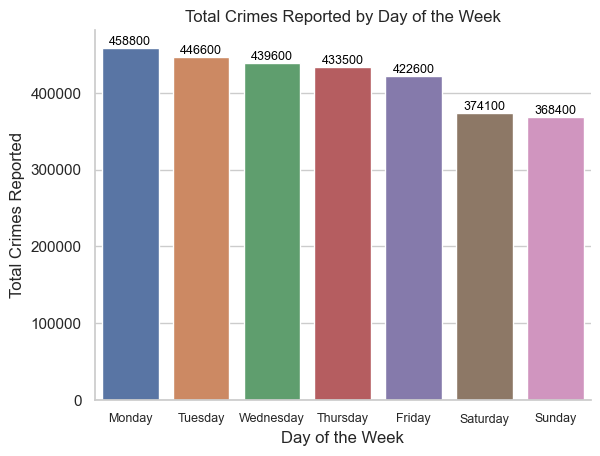

In [ ]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x="Day", y="Crime", hue="Variable", data=dayrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Day")
ax.set_xticklabels(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    fontsize=9,
)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        p.get_height(),
        "%d" % round(int(p.get_height()), -2),
        fontsize=9,
        color="black",
        ha="center",
        va="bottom",
    )
sns.despine(fig)

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → </i></font> <font color='white' size='10'><i>**Model**</i></font> <font size='5'><i>→ Deliver</i></font>

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → Model → </i></font> <font color='white' size='10'><i>**Deliver**</i></font>